In [35]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [36]:
end= datetime.now()
start=datetime(end.year-20,end.month,end.day)
stock="HDB"

In [37]:
data=yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [38]:
data.head(3)

Price,Close,High,Low,Open,Volume
Ticker,HDB,HDB,HDB,HDB,HDB
Date,,,,,
2005-04-25,3.774418,3.789442,3.695766,3.711673,610000
2005-04-26,3.773535,3.773535,3.711673,3.711673,456000
2005-04-27,3.748790,3.776185,3.672789,3.763813,1057000


In [39]:
for i in range((start.year),(end.year)):
    print(i,list(data.index.year).count(i))

2005 175
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


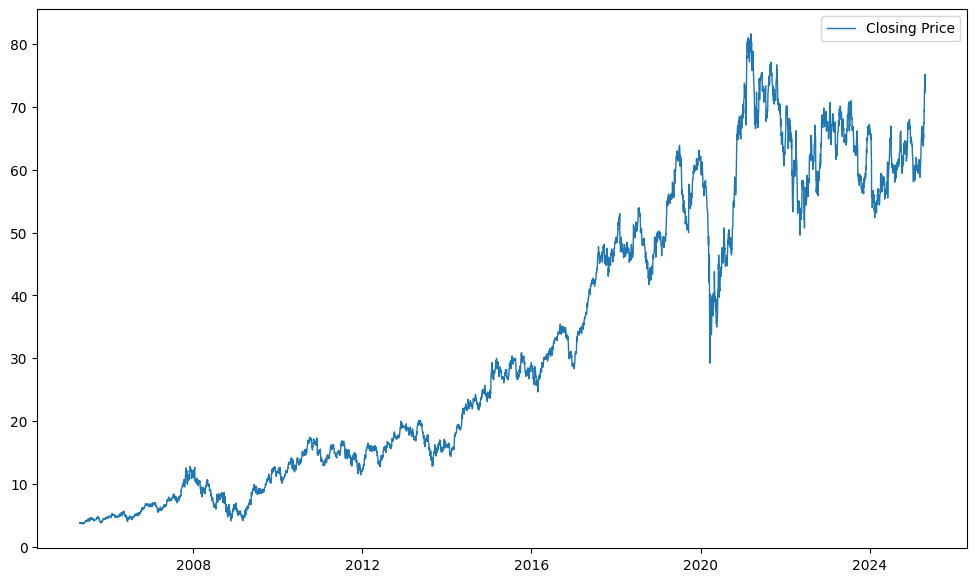

In [40]:
plt.figure(figsize=(12,7))
plt.plot(data["Close"],label="Closing Price",linewidth=1)
plt.legend()
plt.show()

In [41]:
data["ema_250"]=data.Close.rolling(250).mean()


In [42]:
data.ema_250[0:250].tail()

Date
2006-04-13         NaN
2006-04-17         NaN
2006-04-18         NaN
2006-04-19         NaN
2006-04-20    4.431417
Name: ema_250, dtype: float64

In [43]:
data["ema_100"]=data.Close.rolling(100).mean()

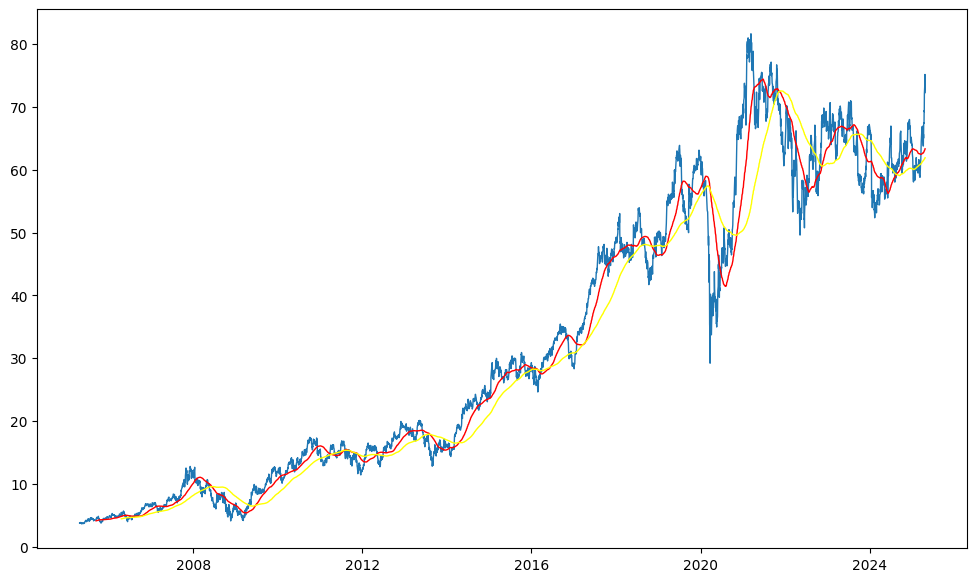

In [10]:
plt.figure(figsize=(12,7))
plt.plot(data["Close"],linewidth=1)
plt.plot(data["ema_100"],linewidth=1,color="red")
plt.plot(data["ema_250"],linewidth=1,color="yellow")

In [11]:
data["percentage_change"]=data["Close"].pct_change()
data["percentage_change"]

Date
2005-04-25         NaN
2005-04-26   -0.000234
2005-04-27   -0.006557
2005-04-28   -0.008722
2005-04-29    0.032343
                ...   
2025-04-16   -0.002161
2025-04-17    0.040139
2025-04-21    0.024014
2025-04-22    0.019114
2025-04-23   -0.038441
Name: percentage_change, Length: 5032, dtype: float64

In [12]:
Closing_price=data["Close"]

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_Closing_price=scaler.fit_transform(Closing_price)

scaled_Closing_price

array([[0.00164266],
       [0.00163133],
       [0.00131413],
       ...,
       [0.89892329],
       [0.91699827],
       [0.87995107]])

In [14]:
y_data=[]
x_data=[]


for i in range(100,len(scaled_Closing_price)):
    
    x_data.append(scaled_Closing_price[i-100:i])
    y_data.append(scaled_Closing_price[i])
    
    
x_data,y_data=np.array(x_data),np.array(y_data)

In [15]:
len(scaled_Closing_price)*70//100

3522

# Spliting

In [16]:
x_train=x_data[0:3522]
y_train=y_data[0:3522]

x_test=x_data[3522:]
y_test=y_data[3522:]

In [17]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((3522, 100, 1), (3522, 1), (1410, 100, 1), (1410, 1))

In [18]:
from keras.models import Sequential

In [19]:
from keras.layers import Dense, LSTM, Dropout

In [20]:
model= Sequential()

In [21]:
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

C:\Users\PAWAN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer="adam",loss="mse")

In [23]:
model.fit(x_train,y_train,batch_size=1,epochs=3) 

Epoch 1/3
3522/3522 ━━━━━━━━━━━━━━━━━━━━ 103s 28ms/step - loss: 9.9261e-04
Epoch 2/3
3522/3522 ━━━━━━━━━━━━━━━━━━━━ 100s 28ms/step - loss: 4.0245e-04
Epoch 3/3
3522/3522 ━━━━━━━━━━━━━━━━━━━━ 77s 22ms/step - loss: 1.7756e-04


In [24]:
s=model.predict(x_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [25]:
inverse_transform = scaler.inverse_transform(s)
inverse_transform

array([[50.8009  ],
       [50.79819 ],
       [50.398434],
       ...,
       [69.173454],
       [70.77398 ],
       [72.01712 ]], dtype=float32)

In [26]:
inverse_y_test = scaler.inverse_transform(y_test)
inverse_y_test

array([[51.17199326],
       [50.62600327],
       [50.63087845],
       ...,
       [73.76999664],
       [75.18000031],
       [72.29000092]])

In [27]:
from sklearn.metrics import mean_squared_error as mse , r2_score, root_mean_squared_error

In [28]:
r2_score(inverse_transform,inverse_y_test),mse(inverse_transform,inverse_y_test)

(0.9487859841494874, 3.3277063242401286)

In [29]:
root_mean_squared_error(inverse_transform,inverse_y_test)

1.824200187545251

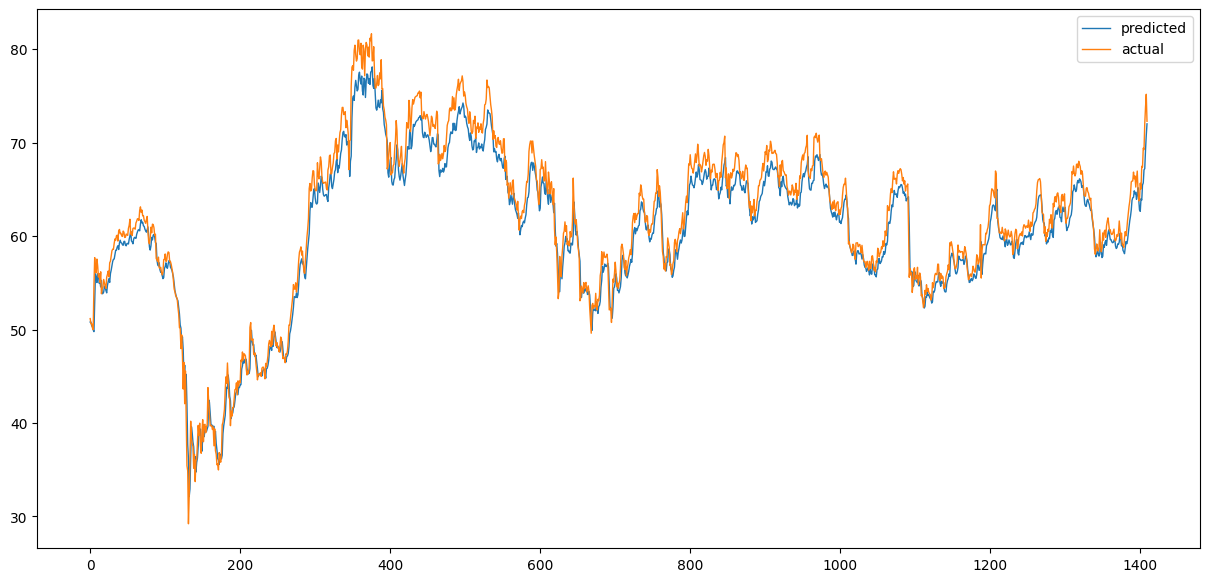

In [30]:
plt.figure(figsize=(15,7))
plt.plot(inverse_transform,label="predicted",linewidth=1)
plt.plot(inverse_y_test,label="actual",linewidth=1)
plt.legend()
plt.show()

In [31]:
ploting_data=pd.DataFrame({

    "actual_values": inverse_y_test.reshape(-1),
    "predicted_values": inverse_transform.reshape(-1)
},
index=data.index[3522+100:])

In [32]:
ploting_data.tail()

,actual_values,predicted_values
Date,,
2025-04-16,69.260002,67.088448
2025-04-17,72.040001,67.225975
2025-04-21,73.769997,69.173454
2025-04-22,75.180000,70.773979
2025-04-23,72.290001,72.017120


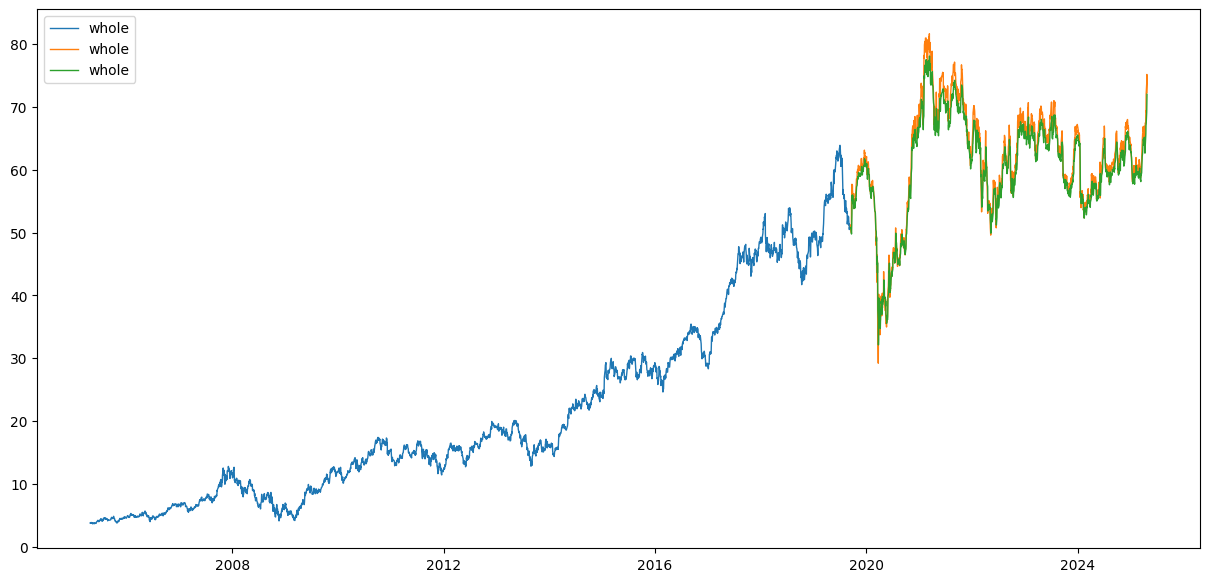

In [33]:
plt.figure(figsize=(15,7))
plt.plot(pd.concat([data["Close"][0:3522+100],ploting_data],axis=0),label="whole",linewidth=1)
# plt.plot(inverse_y_test,label="actual",linewidth=1)
plt.legend()
plt.show()

In [34]:
model.save("latest_stock_price_model1.keras")